In [1]:
%matplotlib inline

In [2]:
from pathlib import Path
import re
import matplotlib.pyplot as plt
import eelbrain
import mne
import trftools

from pprint import pprint
import numpy as np

In [3]:
## ESLs ##

#STIMULI = [str(i) for i in range(1, 13)]
DATA_ROOT = Path("/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results")  #Path("~").expanduser() / 'Data' / 'Alice'
#PREDICTOR_audio_DIR = DATA_ROOT / 'TRFs_pridictors/audio_predictors'
#PREDICTOR_word_DIR = DATA_ROOT / 'TRFs_pridictors/word_predictors'
EEG_DIR = DATA_ROOT / 'EEG_ESLs' / 'Alice_ESL_ICAed_fif'
ESL_SUBJECTS = [path.name for path in EEG_DIR.iterdir() if re.match(r'n_S\d*', path.name)]  #S01_alice-raw.fif
# Define a target directory for TRF estimates and make sure the directory is created
TRF_DIR = DATA_ROOT / 'TRFs_ESLs'
TRF_DIR.mkdir(exist_ok=True)
print(ESL_SUBJECTS)

['n_S001_ICAed_raw.fif', 'n_S002_ICAed_raw.fif', 'n_S003_ICAed_raw.fif', 'n_S004_ICAed_raw.fif', 'n_S005_ICAed_raw.fif', 'n_S006_ICAed_raw.fif', 'n_S008_ICAed_raw.fif', 'n_S007_ICAed_raw.fif']


[[3,
  <NDVar '1': 57 sensor>,
  <NDVar 'gammatone': 57 sensor, 8 frequency, 114 time>],
 [4,
  <NDVar '1': 57 sensor>,
  <NDVar 'gammatone': 57 sensor, 8 frequency, 114 time>],
 [5,
  <NDVar '1': 57 sensor>,
  <NDVar 'gammatone': 57 sensor, 8 frequency, 114 time>],
 [6,
  <NDVar '1': 57 sensor>,
  <NDVar 'gammatone': 57 sensor, 8 frequency, 114 time>],
 [7,
  <NDVar '1': 57 sensor>,
  <NDVar 'gammatone': 57 sensor, 8 frequency, 114 time>],
 [8,
  <NDVar '1': 57 sensor>,
  <NDVar 'gammatone': 57 sensor, 8 frequency, 114 time>]]
subject
-------
3      
4      
5      
6      
7      
8      
-------
NDVars: det, trf


"\nsensor = res.proportion_explained\n\nsensor_plot = eelbrain.plot.SensorMap(res.h[0]) # plot all the channels\ntopomap_plot = eelbrain.plot.Topomap(res.h[0], w=10, h=4)\nprint(res.h[0])\n\n\n#p = eelbrain.plot.Topomap(res.h[0]('sensor',)) #,sensors=sensor, w=6, h=5)\n\n#print(type(res.h[0]))\n#timeINT = res.h[0].shape[2]\n#print(type(time))\n#p = eelbrain.plot.TopoButterfly(res[0], w=10, h=4)\n#p.set_time(.180)\n"

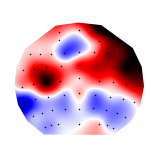

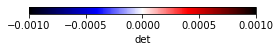

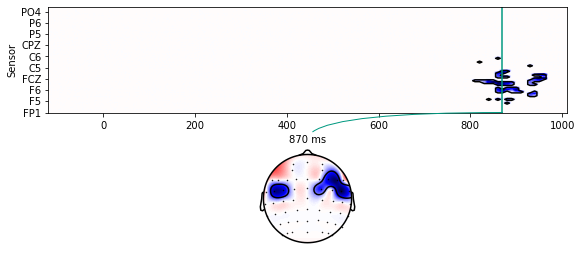

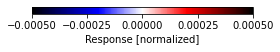

In [10]:
### For ESLs  ###
#subj = 2
"""
subject_nSTR_p = "n_S%.3d_ICAed_raw.fif" %subj

raw = mne.io.read_raw_fif(EEG_DIR / f'{subject_nSTR_p}', preload=True)

montage_x = eelbrain.load.fiff.sensor_dim(raw.info)
#temp_data = eeg_.T *1e+6
eeg_concatenated = eelbrain.NDVar(temp_data, (time, montage_x), name='EEG', info={'unit': 'µV'})

SUBJECTS = ['1', '2', '3', '4', '5', '6', '7']
rows = []
for subject in SUBJECTS:
    trf = eelbrain.load.unpickle('Subj%s_TRFs_envelop_w_on.pickle'%(subject))
    rows.append([subject, trf.proportion_explained, trf.h[0].abs()])
    pass
data_env = eelbrain.Dataset.from_caselist(['subject', 'det', 'trf'], rows)
"""
subj_sLIST = [3, 4, 5, 6, 7, 8]
rowsLIST = []

# res.h[0] >> <NDVar 'gammatone': 57 sensor, 8 frequency, 114 time>

for subj in  subj_sLIST:
    res = eelbrain.load.unpickle(TRF_DIR / Path('S%.3d/S%.3d acoustic.pickle'%(subj, subj)))
    rowsLIST.append([subj, res.proportion_explained, res.h[0]])#.abs()])
data_env = eelbrain.Dataset.from_caselist(['subject', 'det', 'trf'], rowsLIST)
pprint(rowsLIST)
print(data_env)


#test that model predictive power on held-out data is > 0
test_envelope = eelbrain.testnd.TTestOneSample('det', ds=data_env, tail=1, pmin=0.1)
p = eelbrain.plot.Topomap(test_envelope)
cb = p.plot_colorbar(width=0.1)


# ## Envelope TRF
# Test the TRF with a one-sample *t*-test against 0. This tests the null-hypothesis that the electrical current direction at each time point was random across subjects. The systematic current directions shown below at anterior electrodes are typical of auditory responses. 

trf_envelope = eelbrain.testnd.TTestOneSample('trf', ds=data_env, pmin=0.1)

# gammatone >> ,t=[0.87]
# gammatone_onset >> ,t=[0.42, 0.52]
p = eelbrain.plot.TopoArray(trf_envelope, t=[0.87], clip='circle', cmap='xpolar', h=4, w = 8) #, t=[0.08, 0.16, 0.22, 0.45]
cb = p.plot_colorbar(width=0.1)


"""
sensor = res.proportion_explained

sensor_plot = eelbrain.plot.SensorMap(res.h[0]) # plot all the channels
topomap_plot = eelbrain.plot.Topomap(res.h[0], w=10, h=4)
print(res.h[0])


#p = eelbrain.plot.Topomap(res.h[0]('sensor',)) #,sensors=sensor, w=6, h=5)

#print(type(res.h[0]))
#timeINT = res.h[0].shape[2]
#print(type(time))
#p = eelbrain.plot.TopoButterfly(res[0], w=10, h=4)
#p.set_time(.180)
"""

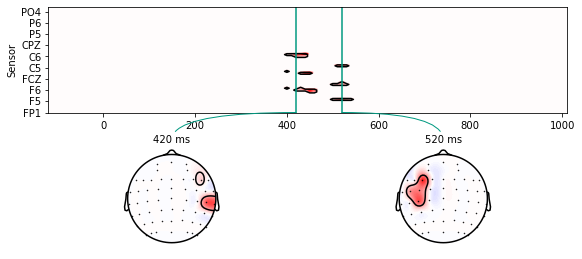

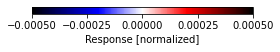

In [5]:
p = eelbrain.plot.TopoArray(trf_envelope,t=[0.42, 0.52], clip='circle', cmap='xpolar', h=4, w=8) #, t=[0.08, 0.16, 0.22, 0.45]
cb = p.plot_colorbar(width=0.1)

In [11]:
## NATIVES ##

STIMULI = [str(i) for i in range(1, 13)]
DATA_ROOT = Path("/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results")  #Path("~").expanduser() / 'Data' / 'Alice'
PREDICTOR_audio_DIR = DATA_ROOT / 'TRFs_pridictors/audio_predictors'
PREDICTOR_word_DIR = DATA_ROOT / 'TRFs_pridictors/word_predictors'
EEG_DIR = DATA_ROOT / 'EEG_Natives' / 'Alice_natives_ICAed_fif'
Native_SUBJECTS = [path.name for path in EEG_DIR.iterdir() if re.match(r'S\d*', path.name)]
# Define a target directory for TRF estimates and make sure the directory is created
TRF_DIR = DATA_ROOT / 'TRFs_Natives'
TRF_DIR.mkdir(exist_ok=True)
print(Native_SUBJECTS)

['S13_Alice-natives_sfreq-100_raw.fif', 'S14_Alice-natives_sfreq-100_raw.fif', 'S12_Alice-natives_sfreq-100_raw.fif', 'S15_Alice-natives_sfreq-100_raw.fif', 'S11_Alice-natives_sfreq-100_raw.fif', 'S16_Alice-natives_sfreq-100_raw.fif', 'S17_Alice-natives_sfreq-100_raw.fif', 'S18_Alice-natives_sfreq-100_raw.fif', 'S19_Alice-natives_sfreq-100_raw.fif', 'S20_Alice-natives_sfreq-100_raw.fif', 'S21_Alice-natives_sfreq-100_raw.fif', 'S01_Alice-natives_sfreq-100_raw.fif', 'S03_Alice-natives_sfreq-100_raw.fif', 'S04_Alice-natives_sfreq-100_raw.fif', 'S05_Alice-natives_sfreq-100_raw.fif', 'S06_Alice-natives_sfreq-100_raw.fif', 'S08_Alice-natives_sfreq-100_raw.fif', 'S10_Alice-natives_sfreq-100_raw.fif', 'S22_Alice-natives_sfreq-100_raw.fif', 'S25_Alice-natives_sfreq-100_raw.fif', 'S26_Alice-natives_sfreq-100_raw.fif', 'S34_Alice-natives_sfreq-100_raw.fif', 'S35_Alice-natives_sfreq-100_raw.fif', 'S36_Alice-natives_sfreq-100_raw.fif', 'S37_Alice-natives_sfreq-100_raw.fif', 'S38_Alice-natives_sfreq

[['13',
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 114 time>],
 ['14',
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 114 time>],
 ['12',
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 114 time>],
 ['15',
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 114 time>],
 ['11',
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 114 time>],
 ['16',
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 114 time>],
 ['17',
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 114 time>],
 ['18',
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 114 time>],
 ['19',
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 114 time>],
 ['20',
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 114 time>],
 ['21',
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 

"\ntrf = eelbrain.load.unpickle(TRF_DIR / Path('S%.2d_Alice-natives_sfreq-100_raw.fif/S%.2d_Alice-natives_sfreq-100_raw.fif acoustic.pickle'%(subj, subj)))\ntrf_sensor = trf.proportion_explained\nprint(trf_sensor)\nprint(trf.h[0].shape)\n\n#print(type(trf.h))\n#plt.plot(trf.h[:,0,:])\np = eelbrain.plot.TopoButterfly(trf.h[0], w=6, h=5)\n\n#p = eelbrain.plot.TopoButterfly(trf.h[0], w=10, h=4, sensors=trf_sensor)\n#p.set_time(.180)\n"

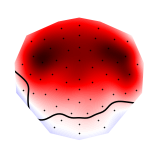

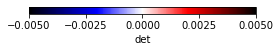

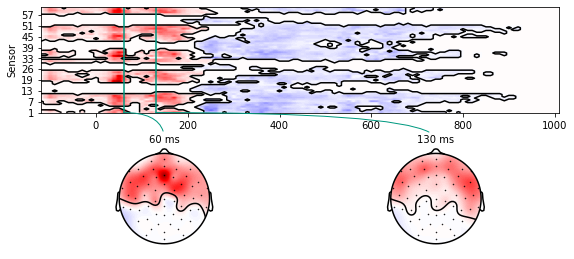

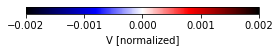

In [12]:
#subj = 1
n_rowsLIST = []
    
for subj in Native_SUBJECTS:
    trf = eelbrain.load.unpickle(TRF_DIR / Path('S%.2d_Alice-natives_sfreq-100_raw.fif/S%.2d_Alice-natives_sfreq-100_raw.fif acoustic.pickle'%(int(subj[1:3]), int(subj[1:3]))))
    n_rowsLIST.append([subj[1:3], trf.proportion_explained, trf.h[0]])#.abs()])
data_env = eelbrain.Dataset.from_caselist(['subject', 'det', 'trf'], n_rowsLIST)
pprint(n_rowsLIST)
print(data_env)


#test that model predictive power on held-out data is > 0
test_envelope = eelbrain.testnd.TTestOneSample('det', ds=data_env, tail=1, pmin=0.05)
p = eelbrain.plot.Topomap(test_envelope)
cb = p.plot_colorbar(width=0.1)


# ## Envelope TRF
# Test the TRF with a one-sample *t*-test against 0. This tests the null-hypothesis that the electrical current direction at each time point was random across subjects. The systematic current directions shown below at anterior electrodes are typical of auditory responses. 

trf_envelope = eelbrain.testnd.TTestOneSample('trf', ds=data_env, pmin=0.05)

p = eelbrain.plot.TopoArray(trf_envelope,t=[0.06, 0.13], clip='circle', cmap='xpolar', h=4, w = 8) #, t=[0.08, 0.16, 0.22, 0.45]
cb = p.plot_colorbar(width=0.1)

"""
trf = eelbrain.load.unpickle(TRF_DIR / Path('S%.2d_Alice-natives_sfreq-100_raw.fif/S%.2d_Alice-natives_sfreq-100_raw.fif acoustic.pickle'%(subj, subj)))
trf_sensor = trf.proportion_explained
print(trf_sensor)
print(trf.h[0].shape)

#print(type(trf.h))
#plt.plot(trf.h[:,0,:])
p = eelbrain.plot.TopoButterfly(trf.h[0], w=6, h=5)

#p = eelbrain.plot.TopoButterfly(trf.h[0], w=10, h=4, sensors=trf_sensor)
#p.set_time(.180)
"""

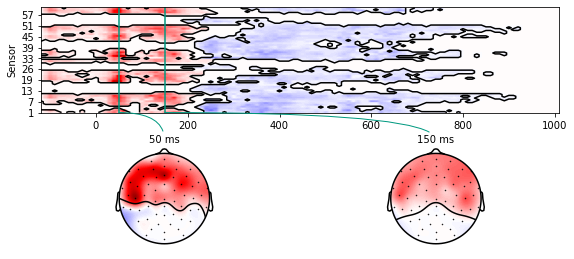

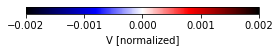

In [13]:
p = eelbrain.plot.TopoArray(trf_envelope,t=[0.05, 0.15], clip='circle', cmap='xpolar', h=4, w = 8) #, t=[0.08, 0.16, 0.22, 0.45]
cb = p.plot_colorbar(width=0.1)